# Miniproject 3: Poem Generation
Ava Penn, Jena Alsup, Mia Mutadich, Lana Lubecke

### Download Data

In [ ]:
import re
import string
import numpy as np

In [ ]:
import requests

url_dict = {
    'shakespeare.txt': 'https://caltech-cs155.s3.us-east-2.amazonaws.com/miniprojects/project3/data/shakespeare.txt',
    'spenser.txt': 'https://caltech-cs155.s3.us-east-2.amazonaws.com/miniprojects/project3/data/spenser.txt',
    'syllable_dict.txt' : 'https://caltech-cs155.s3.us-east-2.amazonaws.com/miniprojects/project3/data/Syllable_dictionary.txt',
    'about_syllable_dict.docx' : 'https://caltech-cs155.s3.us-east-2.amazonaws.com/miniprojects/project3/data/syllable_dict_explanation.docx'
}

def download_file(file_path):
    url = url_dict[file_path]
    print('Start downloading...')
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(file_path, 'wb') as f:
            for chunk in r.iter_content(chunk_size=1024 * 1024 * 1024):
                f.write(chunk)
    print('Complete')

download_file('shakespeare.txt') #all the shakespeare sonnets
download_file('spenser.txt') #all the spenser sonnets
download_file('syllable_dict.txt') #all the words that appear in the shakespeare sonnets, followed by number of syllables
download_file('about_syllable_dict.docx') #info

Start downloading...
Complete
Start downloading...
Complete
Start downloading...
Complete
Start downloading...
Complete


### Reading Data

In [ ]:
#read the data from shakespeare.txt, and store in string
shakespeare_f = open('shakespeare.txt', 'r')
shakespeare_str = shakespeare_f.read()

spenser_f = open('spenser.txt', 'r')
spenser_str = spenser_f.read()

syllable_dict_f = open('syllable_dict.txt', 'r')
syllable_dict_str = syllable_dict_f.read()

Parse the syllables dictionary

In [ ]:
syllable_dict = {} #hashmap of (word, syllables)
for line in syllable_dict_str.split("\n"):
    line_tpl = line.split(" ")
    if (line_tpl[len(line_tpl) - 1].startswith('E')):
        #print(line_tpl[len(line_tpl) - 1])
        line_tpl[len(line_tpl) - 1] = line_tpl[len(line_tpl) - 1][1]
    if (line_tpl[len(line_tpl) - 1] == ''):
        continue
    syllable_dict[line_tpl[0]] = int(line_tpl[len(line_tpl) - 1])

print(syllable_dict)

{"'gainst": 1, "'greeing": 2, "'scaped": 1, "'tis": 1, "'twixt": 1, 'a': 1, 'a-doting': 3, 'abhor': 2, 'abide': 2, 'able': 2, 'about': 2, 'above': 2, 'absence': 2, 'absent': 2, 'abundance': 3, 'abundant': 3, 'abuse': 2, 'abused': 2, 'abuses': 3, 'abysm': 2, 'accents': 2, 'acceptable': 4, 'acceptance': 3, 'accessary': 4, 'accident': 3, 'accidents': 3, 'account': 2, 'accumulate': 4, 'accuse': 2, 'accusing': 3, 'achieve': 2, 'acknowledge': 3, 'acquaintance': 3, 'acquainted': 3, 'act': 1, 'action': 2, 'active': 2, 'actor': 2, 'add': 1, 'added': 2, "adder's": 2, 'addeth': 2, 'adding': 2, 'addition': 3, 'adieu': 2, 'adjunct': 2, 'admire': 2, 'admired': 3, 'admiring': 3, 'admit': 2, 'admitted': 3, 'adonis': 3, 'adore': 2, 'adulterate': 3, 'advance': 2, 'advantage': 3, 'adverse': 2, 'advised': 2, 'advocate': 3, 'afar': 2, 'affable': 3, 'affairs': 2, 'affections': 3, 'afford': 2, 'affords': 2, 'afloat': 2, 'afresh': 2, 'after': 2, 'after-loss': 3, 'afterwards': 3, 'again': 2, 'against': 2, 'age

Project 6 code (no solutions yet)

###Preprocessing for HMM

Clean the shakespeare sonnets string

In [ ]:
shakespeare_cleaned = ""
def containsdigit(s):
  return any(char.isdigit() for char in s)

for line in shakespeare_str.split("\n"):
    line = line.lower().strip()
    if (line == "" or containsdigit(line)):
        continue

    for char in line:
        if (char == ' ' or char == '-' or char == '\''):
            shakespeare_cleaned += char
        elif (char in string.punctuation):
            continue
        else:
            shakespeare_cleaned += char
    shakespeare_cleaned += '\n'

shakespeare_processed = ""
for line in shakespeare_cleaned.split('\n'):
    for word in line.split():
        if (word in syllable_dict):
            shakespeare_processed += word + " "
        else:
            continue
    shakespeare_processed = shakespeare_processed[0:len(shakespeare_processed) - 1]
    shakespeare_processed += '\n'

Put the cleaned shakespeare text in an observation map and also observations array

In [ ]:
def parse_shakespeare_observations(text):
    # Convert text to dataset.
    lines = [line.split() for line in text.split('\n') if line.split()]
    obs_counter = 0
    obs = []
    obs_map = {}

    for line in lines:
        obs_elem = []

        for word in line:
            #word = re.sub(r'[^\w]', '', word).lower()
            if (word not in syllable_dict):
                print(word)
            if word not in obs_map:
                # Add unique words to the observations map.
                obs_map[word] = obs_counter
                obs_counter += 1

            # Add the encoded word.
            obs_elem.append(obs_map[word])

        # Add the encoded sequence.
        obs.append(obs_elem)

    return obs, obs_map

In [ ]:
shakespeare_obs, shakespeare_obs_map = parse_shakespeare_observations(shakespeare_processed)

In [ ]:
# added for extra credit: incorporating spenser dict

spenser_cleaned = ""
def containsdigit(s):
  return any(char.isdigit() for char in s)

for line in spenser_str.split("\n"):
    line = line.lower().strip()
    if (line == "" or containsdigit(line)):
        continue

    for char in line:
        if (char == ' ' or char == '-' or char == '\''):
            spenser_cleaned += char
        elif (char in string.punctuation):
            continue
        else:
            spenser_cleaned += char
    spenser_cleaned += '\n'

spenser_processed = ""
for line in spenser_cleaned.split('\n'):
    for word in line.split():
        if (word in syllable_dict):
            spenser_processed += word + " "
        else:
            continue
    spenser_processed = spenser_processed[0:len(spenser_processed) - 1]
    spenser_processed += '\n'

combined_processed = shakespeare_processed + spenser_processed
combined_obs, combined_obs_map = parse_shakespeare_observations(combined_processed)

# Implementing Models

## HMM Code

In [ ]:
from pickle import LONG1
import random
# You can use this skeleton code to complete the HMM
# implementation of set 5.
#
# Some pointers to get you started:
#
#     - Choose your notation carefully and consistently! Readable
#       notation will make all the difference in the time it takes you
#       to implement this class, as well as how difficult it is to debug.
#
#     - Read the documentation in this file! Make sure you know what
#       is expected from each function and what each variable is.
#
#     - Any reference to "the (i, j)^th" element of a matrix T means that
#       you should use T[i][j].
#
#     - Note that in our solution code, no NumPy was used. That is, there
#       are no fancy tricks here, just basic coding. If you understand HMMs
#       to a thorough extent, the rest of this implementation should come
#       naturally. However, if you'd like to use NumPy, feel free to.
#
#     - Take one step at a time! Move onto the next algorithm to implement
#       only if you're absolutely sure that all previous algorithms are
#       correct. We are providing you waypoints for this reason.
#
# To get started, just fill in code where indicated. Best of luck!

class HiddenMarkovModel:
    '''
    Class implementation of Hidden Markov Models.
    '''

    def __init__(self, A, O):
        '''
        Initializes an HMM. Assumes the following:
            - States and observations are integers starting from 0.
            - There is a start state (see notes on A_start below). There
              is no integer associated with the start state, only
              probabilities in the vector A_start.
            - There is no end state.
        Arguments:
            A:          Transition matrix with dimensions L x L.
                        The (i, j)^th element is the probability of
                        transitioning from state i to state j. Note that
                        this does not include the starting probabilities.
            O:          Observation matrix with dimensions L x D.
                        The (i, j)^th element is the probability of
                        emitting observation j given state i.
        Parameters:
            L:          Number of states.

            D:          Number of observations.

            A:          The transition matrix.

            O:          The observation matrix.

            A_start:    Starting transition probabilities. The i^th element
                        is the probability of transitioning from the start
                        state to state i. For simplicity, we assume that
                        this distribution is uniform.
        '''

        self.L = len(A)
        self.D = len(O[0])
        self.A = A
        self.O = O
        self.A_start = [1. / self.L for _ in range(self.L)]


    def viterbi(self, x):
        '''
        Uses the Viterbi algorithm to find the max probability state
        sequence corresponding to a given input sequence.
        Arguments:
            x:          Input sequence in the form of a list of length M,
                        consisting of integers ranging from 0 to D - 1.
        Returns:
            max_seq:    State sequence corresponding to x with the highest
                        probability.
        '''

        M = len(x)      # Length of sequence.

        # The (i, j)^th elements of probs and seqs are the max probability
        # of the prefix of length i ending in state j and the prefix
        # that gives this probability, respectively.
        #
        # For instance, probs[1][0] is the probability of the prefix of
        # length 1 ending in state 0.
        probs = [[0. for _ in range(self.L)] for _ in range(M + 1)]
        seqs = [['' for _ in range(self.L)] for _ in range(M + 1)]

        # include initial probabilities
        for l in range(self.L):
          probs[1][l] = self.A_start[l] * self.O[l][x[0]]
          seqs[1][l] = str(l)

        for k in range(2, M + 1) : # traverse the input sequence
            for l in range(self.L): # traverse all states
              max_p = float('-inf')
              max_p_seq = ''
              for j in range(self.L): # find most likely path
                  curr_p = probs[k - 1][j] * self.A[j][l] * self.O[l][x[k - 1]]
                  if curr_p > max_p:
                      max_p = curr_p
                      max_p_seq = seqs[k-1][j] + str(l)
              probs[k][l] = max_p
              seqs[k][l] = max_p_seq

        end_state = probs[M].index(max(probs[M]))
        max_seq = seqs[M][end_state]

        return max_seq


    def forward(self, x, normalize=False):
        '''
        Uses the forward algorithm to calculate the alpha probability
        vectors corresponding to a given input sequence.
        Arguments:
            x:          Input sequence in the form of a list of length M,
                        consisting of integers ranging from 0 to D - 1.
            normalize:  Whether to normalize each set of alpha_j(i) vectors
                        at each i. This is useful to avoid underflow in
                        unsupervised learning.
        Returns:
            alphas:     Vector of alphas.
                        The (i, j)^th element of alphas is alpha_j(i),
                        i.e. the probability of observing prefix x^1:i
                        and state y^i = j.
                        e.g. alphas[1][0] corresponds to the probability
                        of observing x^1:1, i.e. the first observation,
                        given that y^1 = 0, i.e. the first state is 0.
        '''
        M = len(x)      # Length of sequence.
        alphas = [[0. for _ in range(self.L)] for _ in range(M + 1)]

        for l in range(self.L):
          alphas[1][l] = self.A_start[l] * self.O[l][x[0]]
        if normalize:
            normalize_by = sum(alphas[1])
            alphas[1] = [alpha / normalize_by for alpha in alphas[1]]

        for k in range(2, M + 1):
            for l in range(self.L):
                alphas_sum = 0
                for j in range(self.L):
                    alphas_sum += alphas[k - 1][j] * self.A[j][l] * self.O[l][x[k - 1]]
                alphas[k][l] = alphas_sum
            if normalize:
                normalize_by = sum(alphas[k])
                alphas[k] = [alpha / normalize_by for alpha in alphas[k]]

        return alphas


    def backward(self, x, normalize=False):
        '''
        Uses the backward algorithm to calculate the beta probability
        vectors corresponding to a given input sequence.
        Arguments:
            x:          Input sequence in the form of a list of length M,
                        consisting of integers ranging from 0 to D - 1.
            normalize:  Whether to normalize each set of alpha_j(i) vectors
                        at each i. This is useful to avoid underflow in
                        unsupervised learning.
        Returns:
            betas:      Vector of betas.
                        The (i, j)^th element of betas is beta_j(i), i.e.
                        the probability of observing prefix x^(i+1):M and
                        state y^i = j.
                        e.g. betas[M][0] corresponds to the probability
                        of observing x^M+1:M, i.e. no observations,
                        given that y^M = 0, i.e. the last state is 0.
        '''

        M = len(x)      # Length of sequence.
        betas = [[0. for _ in range(self.L)] for _ in range(M + 1)]

        for l in range(self.L):
          betas[M][l] = 1
        if normalize:
          normalize_by = sum(betas[M])
          for i in range(len(betas[M])):
            betas[M][i] = betas[M][i] / normalize_by

        for k in range(M - 1, 0, -1):
          for l in range(self.L):
            beta_sum = 0
            for j in range(self.L):
              beta_sum += betas[k+1][j] * self.A[l][j] * self.O[j][x[k]]
            betas[k][l] = beta_sum
          if normalize:
            normalize_by = sum(betas[k])
            for i in range(len(betas[k])):
              betas[k][i] = betas[k][i] / normalize_by

        return betas


    def supervised_learning(self, X, Y):
        '''
        Trains the HMM using the Maximum Likelihood closed form solutions
        for the transition and observation matrices on a labeled
        datset (X, Y). Note that this method does not return anything, but
        instead updates the attributes of the HMM object.
        Arguments:
            X:          A dataset consisting of input sequences in the form
                        of lists of variable length, consisting of integers
                        ranging from 0 to D - 1. In other words, a list of
                        lists.
            Y:          A dataset consisting of state sequences in the form
                        of lists of variable length, consisting of integers
                        ranging from 0 to L - 1. In other words, a list of
                        lists.
                        Note that the elements in X line up with those in Y.
        '''

        # Calculate each element of A using the M-step formulas.
        for l1 in range(self.L):
          for l2 in range(self.L):
            num = denom = 0
            for i, y in enumerate(Y):
              transitions = [y[j-1] == l1 and y[j] == l2 for j in range(1, len(y))]
              num += sum(transitions)
              denom += sum(y[j-1] == l1 for j in range(1, len(y)))
            if denom > 0:
              self.A[l1][l2] = num / denom
            else:
              self.A[l1][l2] = 0

        # Calculate each element of O using the M-step formulas.
        for l in range(self.L):
          for d in range(self.D):
            num = denom = 0
            for i in range(len(X)):
              for j in range(len(Y[i])):
                if Y[i][j] == l:
                  denom += 1
                  if X[i][j] == d:
                    num += 1
              if denom > 0:
                self.O[l][d] = num / denom
              else:
                self.O[l][d] = 0


    def unsupervised_learning(self, X, N_iters):
        '''
        Trains the HMM using the Baum-Welch algorithm on an unlabeled
        datset X. Note that this method does not return anything, but
        instead updates the attributes of the HMM object.
        Arguments:
            X:          A dataset consisting of input sequences in the form
                        of variable-length lists, consisting of integers
                        ranging from 0 to D - 1. In other words, a list of
                        lists.
            N_iters:    The number of iterations to train on.
        '''
        for iter in range(N_iters):
          A_numer = np.zeros((self.L, self.L))
          A_denom = np.zeros((self.L, self.L))
          O_numer = np.zeros((self.L, self.D))
          O_denom = np.zeros((self.L, self.D))

          for x in X:
            M = len(x)
            alphas = self.forward(x, normalize=True)
            betas = self.backward(x, normalize=True)
            for i in range(1, len(x) + 1):
              Paz = []
              for l in range(self.L):
                Paz.append(alphas[i][l] * betas[i][l])
              normalize_by = np.sum(Paz)
              if normalize_by != 0:
                Paz /= normalize_by


              for l in range(self.L):
                O_numer[l][x[i - 1]] += Paz[l]
                O_denom[l] += Paz[l]

              if i < len(x):
                Pab = np.zeros((self.L, self.L))
                for l1 in range(self.L):
                  for l2 in range(self.L):
                    Pab[l1][l2] = alphas[i][l1] * self.A[l1][l2] * self.O[l2][x[i]] * betas[i + 1][l2]
                normalize_by = np.sum(Pab)
                if normalize_by != 0:
                  Pab /= normalize_by


                for l1 in range(self.L):
                  A_denom[l1] += Paz[l1]
                  for l2 in range(self.L):
                    A_numer[l1][l2] += Pab[l1][l2]

          self.A = np.divide(A_numer, A_denom, where=A_denom != 0)
          self.O = np.divide(O_numer, O_denom, where=O_denom != 0)


    def generate_emission(self, M, seed=None):
        '''
        Generates an emission of length M, assuming that the starting state
        is chosen uniformly at random.
        Arguments:
            M:          Length of the emission to generate.
        Returns:
            emission:   The randomly generated emission as a list.
            states:     The randomly generated states as a list.
        '''

        # (Re-)Initialize random number generator
        rng = np.random.default_rng(seed=seed)

        emission = []
        states = []

        curr_state = rng.choice(range(self.L))
        for m in range(M):
            states.append(curr_state)
            emission.append(rng.choice(range(self.D), p = self.O[curr_state]))
            curr_state = rng.choice(range(self.L), p = self.A[curr_state])

        return emission, states



    def probability_alphas(self, x):
        '''
        Finds the maximum probability of a given input sequence using
        the forward algorithm.
        Arguments:
            x:          Input sequence in the form of a list of length M,
                        consisting of integers ranging from 0 to D - 1.
        Returns:
            prob:       Total probability that x can occur.
        '''

        # Calculate alpha vectors.
        alphas = self.forward(x)

        # alpha_j(M) gives the probability that the state sequence ends
        # in j. Summing this value over all possible states j gives the
        # total probability of x paired with any state sequence, i.e.
        # the probability of x.
        prob = sum(alphas[-1])
        return prob


    def probability_betas(self, x):
        '''
        Finds the maximum probability of a given input sequence using
        the backward algorithm.
        Arguments:
            x:          Input sequence in the form of a list of length M,
                        consisting of integers ranging from 0 to D - 1.
        Returns:
            prob:       Total probability that x can occur.
        '''

        betas = self.backward(x)

        # beta_j(1) gives the probability that the state sequence starts
        # with j. Summing this, multiplied by the starting transition
        # probability and the observation probability, over all states
        # gives the total probability of x paired with any state
        # sequence, i.e. the probability of x.
        prob = sum([betas[1][j] * self.A_start[j] * self.O[j][x[0]] \
                    for j in range(self.L)])

        return prob


def supervised_HMM(X, Y):
    '''
    Helper function to train a supervised HMM. The function determines the
    number of unique states and observations in the given data, initializes
    the transition and observation matrices, creates the HMM, and then runs
    the training function for supervised learning.
    Arguments:
        X:          A dataset consisting of input sequences in the form
                    of lists of variable length, consisting of integers
                    ranging from 0 to D - 1. In other words, a list of lists.
        Y:          A dataset consisting of state sequences in the form
                    of lists of variable length, consisting of integers
                    ranging from 0 to L - 1. In other words, a list of lists.
                    Note that the elements in X line up with those in Y.
    '''
    # Make a set of observations.
    observations = set()
    for x in X:
        observations |= set(x)

    # Make a set of states.
    states = set()
    for y in Y:
        states |= set(y)

    # Compute L and D.
    L = len(states)
    D = len(observations)

    # Randomly initialize and normalize matrix A.
    A = [[random.random() for i in range(L)] for j in range(L)]

    for i in range(len(A)):
        norm = sum(A[i])
        for j in range(len(A[i])):
            A[i][j] /= norm

    # Randomly initialize and normalize matrix O.
    O = [[random.random() for i in range(D)] for j in range(L)]

    for i in range(len(O)):
        norm = sum(O[i])
        for j in range(len(O[i])):
            O[i][j] /= norm

    # Train an HMM with labeled data.
    HMM = HiddenMarkovModel(A, O)
    HMM.supervised_learning(X, Y)

    return HMM

def unsupervised_HMM(X, n_states, N_iters, seed=None):
    '''
    Helper function to train an unsupervised HMM. The function determines the
    number of unique observations in the given data, initializes
    the transition and observation matrices, creates the HMM, and then runs
    the training function for unsupervised learing.
    Arguments:
        X:          A dataset consisting of input sequences in the form
                    of lists of variable length, consisting of integers
                    ranging from 0 to D - 1. In other words, a list of lists.
        n_states:   Number of hidden states to use in training.

        N_iters:    The number of iterations to train on.
        rng:        The random number generator for reproducible result.
                    Default to RandomState(1).
    '''
    # Initialize random number generator
    rng = np.random.default_rng(seed=seed)

    # Make a set of observations.
    observations = set()
    for x in X:
        observations |= set(x)

    # Compute L and D.
    L = n_states
    D = len(observations)

    # Randomly initialize and normalize matrix A.
    A = [[rng.random() for i in range(L)] for j in range(L)]

    for i in range(len(A)):
        norm = sum(A[i])
        for j in range(len(A[i])):
            A[i][j] /= norm

    # Randomly initialize and normalize matrix O.
    O = [[rng.random() for i in range(D)] for j in range(L)]

    for i in range(len(O)):
        norm = sum(O[i])
        for j in range(len(O[i])):
            O[i][j] /= norm

    # Train an HMM with unlabeled data.
    HMM = HiddenMarkovModel(A, O)
    HMM.unsupervised_learning(X, N_iters)

    return HMM

In [ ]:
def obs_map_reverser(obs_map):
    obs_map_r = {}

    for key in obs_map:
        obs_map_r[obs_map[key]] = key

    return obs_map_r

def sample_sentence(hmm, obs_map, n_words=100, seed=None):
    # Get reverse map.
    obs_map_r = obs_map_reverser(obs_map)

    # Sample and convert sentence.
    emission, states = hmm.generate_emission(n_words, seed=seed)
    sentence = [obs_map_r[i] for i in emission]

    return ' '.join(sentence)

def count_syllables(sentence):
    total = 0
    for word in sentence.split(" "):
        total += syllable_dict[word]
    return total

def generate_sonnet(hmm):
    #must have 14 lines in total and 10 syllables per line
    result = ""
    for i in range(14):
        n_wds = 7
        sentence = sample_sentence(hmm, shakespeare_obs_map, n_words=n_wds)
        while (count_syllables(sentence) != 10):
            if (count_syllables(sentence) < 10):
                n_wds += 1
            if (count_syllables(sentence) > 10):
                n_wds -= 1
            sentence = sample_sentence(hmm, shakespeare_obs_map, n_words=n_wds)

        result += sentence + '\n'
    return result


In [ ]:
hmm4 = unsupervised_HMM(shakespeare_obs, 4, 100, seed=123)
hmm8 = unsupervised_HMM(shakespeare_obs, 8, 100, seed=123)
hmm10 = unsupervised_HMM(shakespeare_obs, 10, 100, seed=123)
hmm12 = unsupervised_HMM(shakespeare_obs, 12, 100, seed=123)
hmm16 = unsupervised_HMM(shakespeare_obs, 16, 100, seed=123)

hmms = [hmm4, hmm8, hmm10, hmm12, hmm16]
hmm_nums = [4,8,10,12,16]

for hmm, num in zip(hmms, hmm_nums):
    print(f"HIDDEN STATE: {num}" )
    print(generate_sonnet(hmm))

KeyboardInterrupt: 

In [ ]:
# Additional Goal: rhyme scheme

def generate_reverse_emission(self, M, endword, seed=None):
    rng = np.random.default_rng(seed=seed)
    emission = []
    states = []

    curr_word = endword
    emission.append(curr_word)
    states.append(rng.choice(range(self.L)))
    curr_state = rng.choice(range(self.L))

    for m in range(M-1):
      states.append(curr_state)
      emission.append(rng.choice(range(self.D), p = self.O[curr_state]))
      poss_prev_states = self.A[:,curr_state]
      most_likely_prev_state = np.argmax(poss_prev_states)
      curr_state = most_likely_prev_state

    return emission[::-1], states[::-1]

def sample_reverse_sentence(hmm, obs_map, endword, n_words=100, seed=None):
    obs_map_r = obs_map_reverser(obs_map)
    emission, states = hmm.generate_reverse_emission(n_words, endword, seed=seed)

    sentence1 = [obs_map_r[i] for i in emission]

    return ' '.join(sentence1)

def generate_rhyming_sonnet(hmm):
  #must have 14 lines in total and 10 syllables per line
    result = ""
    len_map = len(rhyme_map)
    rhyme_keys = list(rhyme_map.keys())
    # 14 zeros
    endwords = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

    # fill out the array of endwords for the sonnet
    for i in range(7):
      idx = random.randint(0, len_map-1)
      # print(idx)
      endword = rhyme_keys[idx]
      endword_pair = rhyme_map[endword]
      if i < 6:
        if i % 2 == 0:
          endwords[i*2] = endword
          endwords[i*2 + 2] = endword_pair
        else:
          endwords[i*2-1] = endword
          endwords[i*2+1] = endword_pair

      else:
        endwords[i*2] = endword
        endwords[i*2+1] = endword_pair

    # print_words = []
    # for word in endwords:
    #   print_words.append(flipped_shakespeare_obs_map[word])
    # print(print_words)

    # Make sentences with the endwords
    for i in range(14):
      endword = endwords[i]
      n_wds = 7
      sentence = sample_reverse_sentence(hmm, shakespeare_obs_map, endword, n_words=n_wds)
      while (count_syllables(sentence) != 10):
          if (count_syllables(sentence) < 10):
              n_wds += 1
          if (count_syllables(sentence) > 10):
              n_wds -= 1
          sentence = sample_reverse_sentence(hmm, shakespeare_obs_map, endword, n_words=n_wds)

      result += sentence + '\n'
    return result

hmm4 = unsupervised_HMM(shakespeare_obs, 4, 100, seed=123)
# hmm8 = unsupervised_HMM(shakespeare_obs, 8, 100, seed=123)
hmm10 = unsupervised_HMM(shakespeare_obs, 10, 100, seed=123)
# hmm12 = unsupervised_HMM(shakespeare_obs, 12, 100, seed=123)
hmm16 = unsupervised_HMM(shakespeare_obs, 16, 100, seed=123)

# hmms = [hmm4, hmm8, hmm10, hmm12, hmm16]
# hmm_nums = [4,8,10,12,16]
hmms = [hmm4, hmm10, hmm16]
hmm_nums = [4,10,16]

for hmm, num in zip(hmms, hmm_nums):
    print(f"HIDDEN STATE: {num}" )
    print("With rhyme scheme: ")
    print(generate_sonnet(hmm))


In [ ]:
# extra credit: incorporating spenser

def spenser_generate_sonnet(hmm):
    #must have 14 lines in total and 10 syllables per line
    result = ""
    for i in range(14):
        n_wds = 7
        sentence = sample_sentence(hmm, combined_obs_map, n_words=n_wds)
        while (count_syllables(sentence) != 10):
            if (count_syllables(sentence) < 10):
                n_wds += 1
            if (count_syllables(sentence) > 10):
                n_wds -= 1
            sentence = sample_sentence(hmm, combined_obs_map, n_words=n_wds)

        result += sentence + '\n'
    return result

spenser_hmm4 = unsupervised_HMM(combined_obs, 4, 100, seed=123)
spenser_hmm8 = unsupervised_HMM(combined_obs, 8, 100, seed=123)
spenser_hmm10 = unsupervised_HMM(combined_obs, 10, 100, seed=123)

spenser_hmms = [spenser_hmm4, spenser_hmm8, spenser_hmm10]
spenser_hmm_nums = [4,8,10]

for spenser_hmm, spenser_num in zip(spenser_hmms, spenser_hmm_nums):
    print(f"HIDDEN STATE: {spenser_num}" )
    print(spenser_generate_sonnet(spenser_hmm))

HIDDEN STATE: 4
that therefore your fire deserve which in a
alack striving which truth unto child lives
which a a farther you find thou cannot
and story the of selling sweet remain
grant guest in my eye the picture's mine dimmed
breast her name majesty sad and cause they
where time in of sufficed have painting from
alone from weak feature ambush and all
power my place ruinate glory and self
if till in are kills statues me heart so
so doth by expressing metre be of
many and death to from the the better
alack your look the cross thy cruel them
confined her heart that say art i night this

HIDDEN STATE: 8
in surmount open thee me and look shall
that that praises excuse thou did that with
for a day thus by no best murd'rous heart
at will of in heavenly neglect decease
these lead a summer quick fine may it say
of the dancing with me love that in those
and behold one depart that do joy it
all thy light deface blooms with in worse and
that who her concord that return her thee
boundless in the

###Additional Goals: Other poetic forms

In [ ]:
def generate_line(hmm, syllables):
    n_wds = int(syllables * 2/3) + 1 #heuristic
    sentence = sample_sentence(hmm, shakespeare_obs_map, n_words=n_wds)
    while (count_syllables(sentence) != syllables):
        if (count_syllables(sentence) < syllables):
            n_wds += 1
        if (count_syllables(sentence) > syllables):
            n_wds -= 1
        sentence = sample_sentence(hmm, shakespeare_obs_map, n_words=n_wds)
    return sentence

def generate_poem(hmm, syllables_pattern):
    #given a pattern of syllables cooresponding to lines in a poem, generate that poem
    result = ""
    for line_syll in syllables_pattern:
        result += generate_line(hmm, line_syll) + "\n"
    return result[:-1]

def generate_haiku(hmm):
    #must have 3 lines, 5,7,5 syllables
    return generate_poem(hmm, [5,7,5])

def generate_nonet(hmm):
    return generate_poem(hmm, [9,8,7,6,5,4,3,2,1])

In [ ]:
hmm = unsupervised_HMM(shakespeare_obs, 100, 16, seed=123)

In [ ]:
print(generate_haiku(hmm))

In [ ]:
print(generate_nonet(hmm))

In [ ]:
print(generate_poem(hmm, [4,8,4,2,2]))

##HMM Visualization

In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud
from matplotlib import animation
from matplotlib.animation import FuncAnimation

In [ ]:
########################################
# CS/CNS/EE 155 2018
# Problem Set 6
#
# Author:       Andrew Kang
# Description:  Set 6 HMM helper
########################################



####################
# WORDCLOUD FUNCTIONS
####################

def mask():
    # Parameters.
    r = 128
    d = 2 * r + 1

    # Get points in a circle.
    y, x = np.ogrid[-r:d-r, -r:d-r]
    circle = (x**2 + y**2 <= r**2)

    # Create mask.
    mask = 255 * np.ones((d, d), dtype=np.uint8)
    mask[circle] = 0

    return mask

def text_to_wordcloud(text, max_words=50, title='', show=True):
    plt.close('all')

    # Generate a wordcloud image.
    wordcloud = WordCloud(random_state=0,
                          max_words=max_words,
                          background_color='white',
                          mask=mask()).generate(text)

    # Show the image.
    if show:
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(title, fontsize=24)
        plt.show()

    return wordcloud

def states_to_wordclouds(hmm, obs_map, max_words=50, show=True):
    # Initialize.
    M = 100000
    n_states = len(hmm.A)
    obs_map_r = obs_map_reverser(obs_map)
    wordclouds = []

    # Generate a large emission.
    emission, states = hmm.generate_emission(M)

    # For each state, get a list of observations that have been emitted
    # from that state.
    obs_count = []
    for i in range(n_states):
        obs_lst = np.array(emission)[np.where(np.array(states) == i)[0]]
        obs_count.append(obs_lst)

    # For each state, convert it into a wordcloud.
    for i in range(n_states):
        obs_lst = obs_count[i]
        sentence = [obs_map_r[j] for j in obs_lst]
        sentence_str = ' '.join(sentence)

        wordclouds.append(text_to_wordcloud(sentence_str, max_words=max_words, title='State %d' % i, show=show))

    return wordclouds


def states_to_wordclouds_modified(hmm, obs_map, max_words=50, show=True):
    # Initialize.
    M = 100000
    n_states = len(hmm.A)
    our_states = range(n_states)
    obs_map_r = obs_map_reverser(obs_map)
    wordclouds = []

    # Generate a large emission.
    emission, states = hmm.generate_emission(M)

    # For each state, get a list of observations that have been emitted
    # from that state.
    obs_count = []
    for i in range(n_states):
        obs_lst = np.array(emission)[np.where(np.array(states) == i)[0]]
        obs_count.append(obs_lst)

    # For each state, convert it into a wordcloud.
    for i in range(n_states):
        obs_lst = obs_count[i]
        sentence = [obs_map_r[j] for j in obs_lst]
        sentence_str = ' '.join(sentence)
        if (i in our_states):
            wordclouds.append(text_to_wordcloud(sentence_str, max_words=max_words, title='State %d' % i, show=show))

    return wordclouds

####################
# HMM FUNCTIONS
####################

def parse_observations(text):
    # Convert text to dataset.
    lines = [line.split() for line in text.split('\n') if line.split()]

    obs_counter = 0
    obs = []
    obs_map = {}

    for line in lines:
        obs_elem = []

        for word in line:
            word = re.sub(r'[^\w]', '', word).lower()
            if word not in obs_map:
                # Add unique words to the observations map.
                obs_map[word] = obs_counter
                obs_counter += 1

            # Add the encoded word.
            obs_elem.append(obs_map[word])

        # Add the encoded sequence.
        obs.append(obs_elem)

    return obs, obs_map

def obs_map_reverser(obs_map):
    obs_map_r = {}

    for key in obs_map:
        obs_map_r[obs_map[key]] = key

    return obs_map_r

def sample_sentence(hmm, obs_map, n_words=100, seed=None):
    # Get reverse map.
    obs_map_r = obs_map_reverser(obs_map)

    # Sample and convert sentence.
    emission, states = hmm.generate_emission(n_words, seed=seed)
    sentence = [obs_map_r[i] for i in emission]

    return ' '.join(sentence).capitalize() + '...'


####################
# HMM VISUALIZATION FUNCTIONS
####################

def visualize_sparsities(hmm, O_max_cols=50, O_vmax=0.1):
    plt.close('all')
    plt.set_cmap('viridis')

    # Visualize sparsity of A.
    plt.imshow(hmm.A, vmax=1.0)
    plt.colorbar()
    plt.title('Sparsity of A matrix')
    plt.show()

    # Visualize parsity of O.
    plt.imshow(np.array(hmm.O)[:, :O_max_cols], vmax=O_vmax, aspect='auto')
    plt.colorbar()
    plt.title('Sparsity of O matrix')
    plt.show()


####################
# HMM ANIMATION FUNCTIONS
####################

def animate_emission(hmm, obs_map, M=8, height=12, width=12, delay=1, seed=None):
    # Parameters.
    lim = 1200
    text_x_offset = 40
    text_y_offset = 80
    x_offset = 580
    y_offset = 520
    R = 420
    r = 100
    arrow_size = 20
    arrow_p1 = 0.03
    arrow_p2 = 0.02
    arrow_p3 = 0.06

    # Initialize.
    n_states = len(hmm.A)
    obs_map_r = obs_map_reverser(obs_map)
    wordclouds = states_to_wordclouds(hmm, obs_map, max_words=20, show=False)

    # Initialize plot.
    fig, ax = plt.subplots()
    fig.set_figheight(height)
    fig.set_figwidth(width)
    ax.grid('off')
    plt.axis('off')
    ax.set_xlim([0, lim])
    ax.set_ylim([0, lim])

    # Plot each wordcloud.
    for i, wordcloud in enumerate(wordclouds):
        x = x_offset + int(R * np.cos(np.pi * 2 * i / n_states))
        y = y_offset + int(R * np.sin(np.pi * 2 * i / n_states))
        ax.imshow(wordcloud.to_array(), extent=(x - r, x + r, y - r, y + r), aspect='auto', zorder=-1)

    # Initialize text.
    text = ax.text(text_x_offset, lim - text_y_offset, '', fontsize=24)

    # Make the arrows.
    zorder_mult = n_states ** 2 * 100
    arrows = []
    for i in range(n_states):
        row = []
        for j in range(n_states):
            # Arrow coordinates.
            x_i = x_offset + R * np.cos(np.pi * 2 * i / n_states)
            y_i = y_offset + R * np.sin(np.pi * 2 * i / n_states)
            x_j = x_offset + R * np.cos(np.pi * 2 * j / n_states)
            y_j = y_offset + R * np.sin(np.pi * 2 * j / n_states)

            dx = x_j - x_i
            dy = y_j - y_i
            d = np.sqrt(dx**2 + dy**2)

            if i != j:
                arrow = ax.arrow(x_i + (r/d + arrow_p1) * dx + arrow_p2 * dy,
                                 y_i + (r/d + arrow_p1) * dy + arrow_p2 * dx,
                                 (1 - 2 * r/d - arrow_p3) * dx,
                                 (1 - 2 * r/d - arrow_p3) * dy,
                                 color=(1 - hmm.A[i][j], ) * 3,
                                 head_width=arrow_size, head_length=arrow_size,
                                 zorder=int(hmm.A[i][j] * zorder_mult))
            else:
                arrow = ax.arrow(x_i, y_i, 0, 0,
                                 color=(1 - hmm.A[i][j], ) * 3,
                                 head_width=arrow_size, head_length=arrow_size,
                                 zorder=int(hmm.A[i][j] * zorder_mult))

            row.append(arrow)
        arrows.append(row)

    emission, states = hmm.generate_emission(M, seed=seed)

    def animate(i):
        if i >= delay:
            i -= delay

            if i == 0:
                arrows[states[0]][states[0]].set_color('red')
            elif i == 1:
                arrows[states[0]][states[0]].set_color((1 - hmm.A[states[0]][states[0]], ) * 3)
                arrows[states[i - 1]][states[i]].set_color('red')
            else:
                arrows[states[i - 2]][states[i - 1]].set_color((1 - hmm.A[states[i - 2]][states[i - 1]], ) * 3)
                arrows[states[i - 1]][states[i]].set_color('red')

            # Set text.
            text.set_text(' '.join([obs_map_r[e] for e in emission][:i+1]).capitalize())

            return arrows + [text]

    # Animate!
    print('\nAnimating...')
    anim = FuncAnimation(fig, animate, frames=M+delay, interval=1000)

    return anim

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
hmm_visualize = unsupervised_HMM(shakespeare_obs, 10, 100)

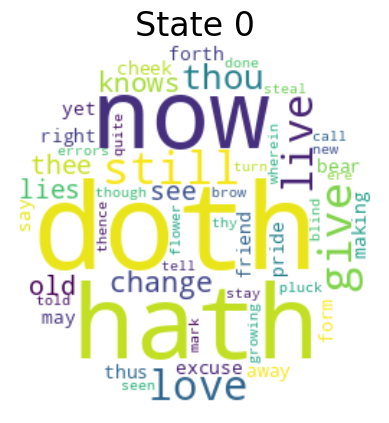

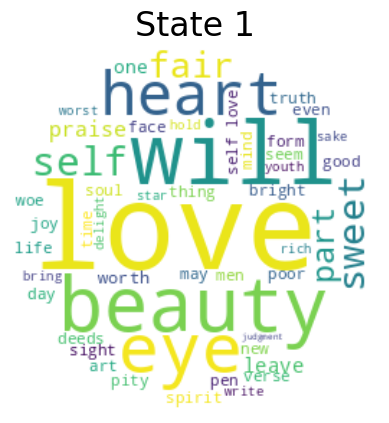

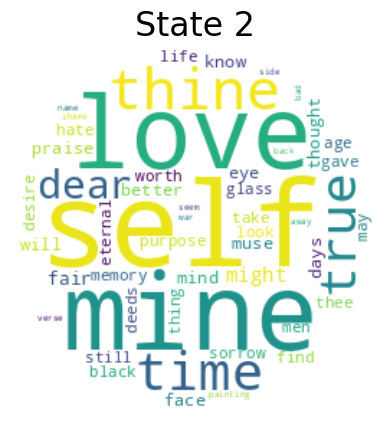

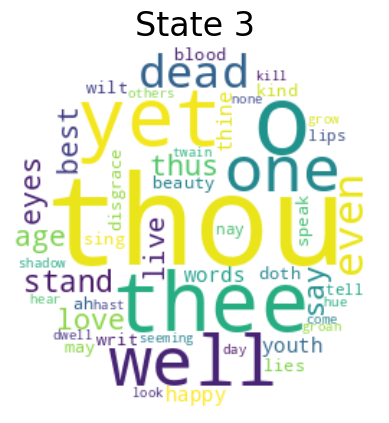

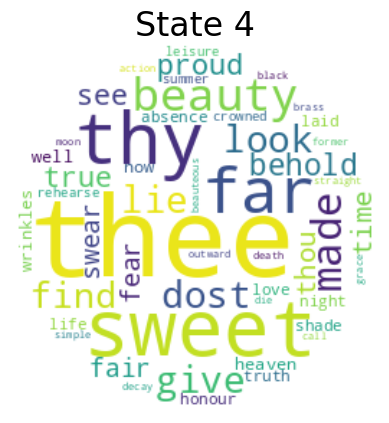

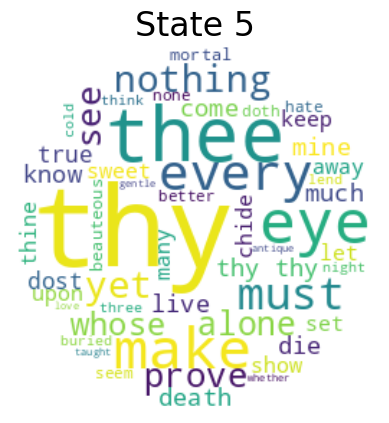

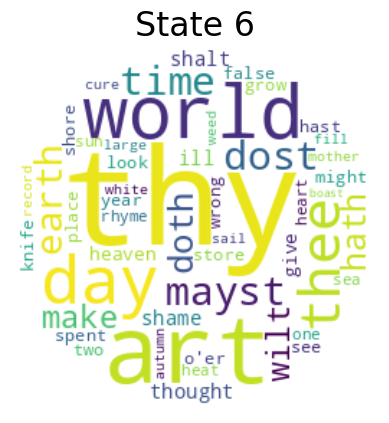

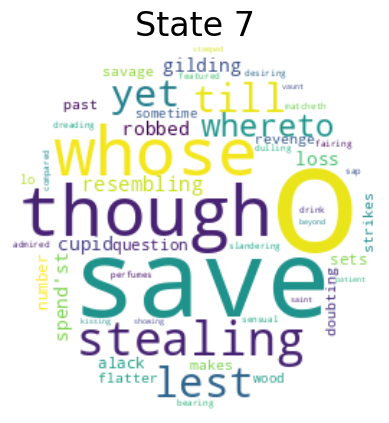

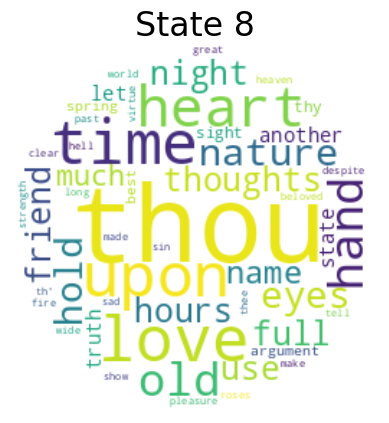

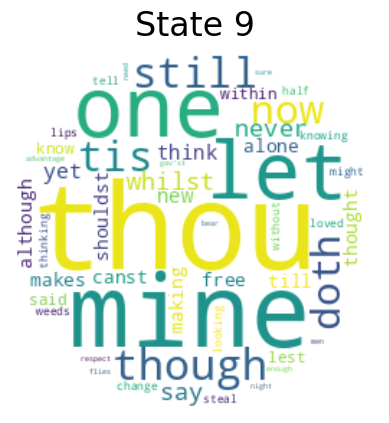

In [ ]:
wordclouds = states_to_wordclouds_modified(hmm_visualize, shakespeare_obs_map)

In [ ]:
#get the top ten words in each state
def states_to_top_words(hmm, obs_map, max_words=50, show=True):
    # Initialize.
    M = 100000
    n_states = len(hmm.A)
    our_states = range(n_states)
    obs_map_r = obs_map_reverser(obs_map)

    # Generate a large emission.
    emission, states = hmm.generate_emission(M)

    # For each state, get a list of observations that have been emitted
    # from that state.
    obs_count = []
    for i in range(n_states):
        obs_lst = np.array(emission)[np.where(np.array(states) == i)[0]]
        obs_count.append(obs_lst)

    # For each state, get the frequency of each word and choose the top ten words
    for i in range(n_states):
        if (i in our_states):
            print(f"HIDDEN STATE {i}")
            state_obs = obs_count[i]
            word_freq = {}
            for obs in state_obs:
                word_freq[obs] = word_freq.get(obs, 0) + 1

            top_words = sorted(word_freq, key=word_freq.get, reverse=True)[:10]
            top_strs = []
            for num in top_words:
                top_strs.append(obs_map_r[num])
            print(top_strs)


In [ ]:
states_to_top_words(hmm_visualize, shakespeare_obs_map)

HIDDEN STATE 0
['to', 'in', 'of', 'is', 'doth', 'that', 'but', 'hath', 'and', 'now']
HIDDEN STATE 1
['love', 'me', 'it', 'have', 'will', 'be', 'more', 'sweet', 'eye', 'she']
HIDDEN STATE 2
['and', 'i', 'on', 'self', 'a', 'thine', 'which', 'mine', 'where', 'that']
HIDDEN STATE 3
['but', 'not', 'that', 'me', 'thou', 'i', 'then', 'you', 'o', 'yet']
HIDDEN STATE 4
['the', 'my', 'thee', 'that', 'this', 'so', 'thy', 'such', 'as', 'their']
HIDDEN STATE 5
['i', 'thy', 'my', 'the', 'that', 'your', 'his', 'no', 'a', 'not']
HIDDEN STATE 6
['of', 'my', 'thy', 'that', 'so', 'the', 'art', 'and', 'their', 'a']
HIDDEN STATE 7
['and', 'when', 'for', 'o', 'which', 'as', 'or', 'if', 'who', 'how']
HIDDEN STATE 8
['thou', 'the', 'to', 'with', 'of', 'all', 'in', 'from', 'is', 'by']
HIDDEN STATE 9
['to', 'for', 'in', 'when', 'and', 'with', 'so', 'which', 'of', 'thou']


Visualizing the transitions


Animating...


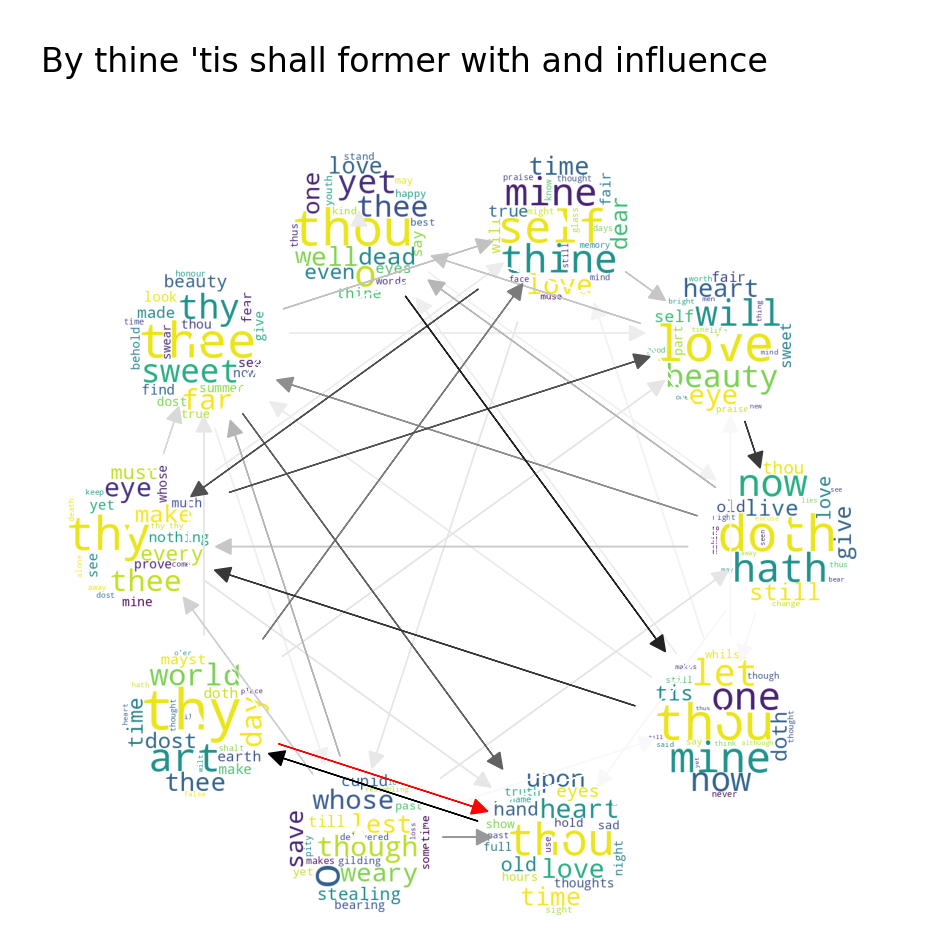

In [ ]:
from IPython.display import HTML
anim = animate_emission(hmm_visualize, shakespeare_obs_map, M=8, seed=123)
HTML(anim.to_html5_video())

## RNN Code

###Preprocessing for RNN

In [ ]:
unique_chars = sorted(list(set(shakespeare_cleaned)))
char_to_index = {}
for index, c in enumerate(unique_chars):
    char_to_index[c] = index

In [ ]:
sequence_length = 40
step = 10  #hyperparameter that we can change
sequences = []
input = []
output = []

def processing(shakespeare_cleaned, sequence_length, char_to_index):
  for i in range(0, len(shakespeare_cleaned) - sequence_length, step):
        input.append(shakespeare_cleaned[i: i + sequence_length - 1])
        output.append(shakespeare_cleaned[i + 1: i + sequence_length])
        sequences.append(shakespeare_cleaned[i: i + sequence_length])

  rnn_tensor= np.zeros((len(sequences), sequence_length , len(unique_chars)))
  for i, sequence in enumerate(input):
      for j, c in enumerate(sequence):
          rnn_tensor[i, j, char_to_index[c]] = 1

  rnn_tensor_input = np.zeros((len(input), sequence_length - 1 , len(unique_chars)))
  for i, sequence in enumerate(input):
      for j, c in enumerate(sequence):
          rnn_tensor_input[i, j, char_to_index[c]] = 1

  rnn_tensor_output = np.zeros((len(output), sequence_length - 1, len(unique_chars)))
  for i, sequence in enumerate(output):
      for j, c in enumerate(sequence):
          rnn_tensor_output[i, j, char_to_index[c]] = 1
  return rnn_tensor, rnn_tensor_input, rnn_tensor_output

### Defining and Training RNN Model


In [ ]:
from torch.utils.data import Dataset
import torch
import torch.nn as nn


class MyDataset(Dataset):

    def __init__(self, seq, input, output):
        self.data = torch.tensor(seq, dtype=torch.float32)
        self.X = torch.tensor(input, dtype=torch.float32)
        self.y = torch.tensor(output, dtype=torch.float32)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        inp = self.X[idx]
        target = self.y[idx]
        return inp, target

In [ ]:
# Check that we pre-processed correctly
seq, x, y = processing(shakespeare_cleaned, sequence_length, char_to_index)
print(np.shape(seq))
print(np.shape(x))
print(np.shape(y))
train_dataset = MyDataset(seq, x, y)
batch_size = 128
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

(9097, 40, 30)
(9097, 39, 30)
(9097, 39, 30)


In [ ]:
# Define the model
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1, dropout=0.1):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.i2h = nn.LSTM(input_size, hidden_size, num_layers=num_layers, dropout=dropout if num_layers > 1 else 0, batch_first=True)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(dropout)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        output, hidden = self.i2h(input, hidden)
        output = self.dropout(output)
        output = output.reshape(-1, self.hidden_size)
        output = self.h2o(output)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self, batch_size):
      return (torch.zeros(1, batch_size, self.hidden_size),torch.zeros(1, batch_size, self.hidden_size))

In [ ]:
# Import packages to let us see how fast the model trains
import time
import math

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [ ]:
# train the model
all_letters = string.ascii_letters + " .,;'-"
n_letters = len(all_letters) + 1
rnn = RNN(len(unique_chars), 128, len(unique_chars))

n_iters = 100
criterion = nn.CrossEntropyLoss()
learning_rate = 0.0005
start = time.time()
rnn.train()

optimizer = torch.optim.Adam(rnn.parameters(), lr=0.0005, weight_decay=1e-5)

for iter in range(1, n_iters + 1):

    for input, target in train_loader:
        optimizer.zero_grad()
        batch_size = input.size(0)
        hidden = rnn.initHidden(batch_size)

        output, hidden = rnn(input, hidden)
        hidden = tuple(h.detach() for h in hidden)
        _, target_indices = target.max(dim=-1)
        target_indices = target_indices.view(-1)
        loss = criterion(output, target_indices)

        loss.backward(retain_graph=True)
        torch.nn.utils.clip_grad_norm_(rnn.parameters(), max_norm=5)
        optimizer.step()

    if iter % 10 == 0 or iter == 0:
      print(f'Iteration: {iter}, Loss: {loss}')
      print('%s (%d %d%%) %.4f' % (timeSince(start), iter, iter / n_iters * 100, loss))


### Generating Emissions from the RNN Model


In [ ]:
def predict(model, input_sequence, T):
  # turn array of characters into tensor of one-hot vectors
  tensor_input = np.zeros((1, len(input_sequence) , len(unique_chars)))
  for j, c in enumerate(input_sequence):
        tensor_input[0, j, char_to_index[c]] = 1
  test = torch.tensor(tensor_input, dtype=torch.float32)
  hidden = rnn.initHidden(batch_size=1)
  model.eval()
  # get model predictions
  out, hidden = model(test, hidden)
  # divide probability distrubtion for the last character of the output by T.
  # Then apply softmax
  probabilites = torch.softmax(out[-1,:]/T, dim=0)
  # Choose character with highest probability
  predicted_class = torch.argmax(probabilites, dim=0)
  return unique_chars[predicted_class]



def sample(model, M, input_seq, window, T):
  # Turn string into array of characters
  character_list = [c for c in input_seq]
  for i in range(M-len(character_list)):
    # Look at a fixed amount of previous characters using window to reduce
    # repitition in emission
    character_list.append(predict(model, character_list[-window:], T))

  return ''.join(character_list)

for T in [0.25, 0.75, 1, 1.5]:
  print("Temperature = " + str(T) + "\n")
  print(sample(rnn, 600, "weary with toil i haste me to my bed", 43, T))